# SUPERFÍCIES QUÁDRICAS


ÍNDICE
1. Hiperbolóide de Duas Folhas
2. Cilíndro
3. Elipsóide
4. Hiperbolóide de Uma Folha
5. Cone
6. Parabolóide Elíptico
7. Parabolóide Hiperbólico

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from numpy import sin, cos, sinh, cosh, pi, sqrt

In [2]:
class eq_par:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

## Função do Gráfico ##
def grafico(titulo,func,i=1,j=1,k=1,c=5,d=5):    
    fig = plt.figure(figsize=(c,d))
    ax = fig.add_subplot(i, j, k, projection = '3d')
    ax.plot_surface(func.x, func.y, func.z, rstride = 3, cstride = 3, alpha = 0.8, cmap = 'plasma_r')
    ax.set_title(titulo, y = 0.95) 
    plt.rcParams['grid.color'] = "gainsboro"
    ax.axis('off')

## HIPERBOLÓIDE DE DUAS FOLHAS

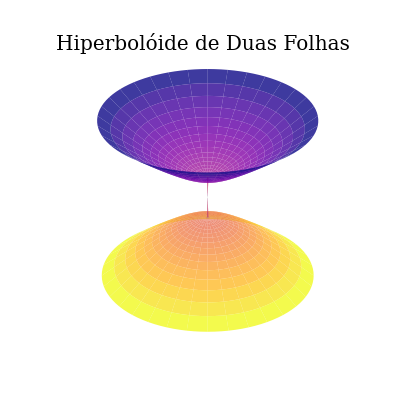

In [3]:
def hiper_2():
    a = 1
    b = 1
    c = 1
    u = np.linspace(-2, 2, 100)
    v = np.linspace(0, 2 * pi, 100)
    u, v = np.meshgrid(u, v)
    x = a * sinh(u) * cos(v)
    y = b * sinh(u) * sin(v)
    z = (c * u * cosh(u))/sqrt(u**2)
    return eq_par(x, y, z)

grafico('Hiperbolóide de Duas Folhas', hiper_2())

Equação do hiperbolóide de duas folhas:  
$-\Large \frac{x ^ 2}{a ^ 2} \normalsize - \Large \frac{y ^ 2}{b ^ 2} \normalsize + \Large \frac{z^ 2}{c^ 2} \normalsize = 1$  
  
  
Equações Paramétricas do hiperboloide de duas folhas:  
$\normalsize x = a \cdot \sinh{u} \cdot \cos{v}$  
  
$\normalsize y = b \cdot \sinh{u} \cdot \sin{v}$  
  
$\normalsize z = \Large \frac{ c \cdot u \cdot \cosh{u} } { \sqrt{u^2} }$  
  
Com $-2 < u < 2$ e $0 < v < \pi$.

---


## CILÍNDRO

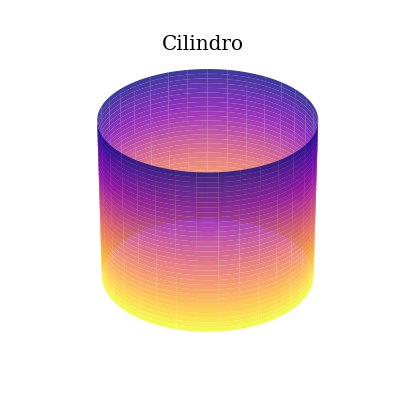

In [4]:
def cilindro():
    a = 1
    b = 1
    c = 1
    z = np.linspace(0,1,100)
    t = np.linspace(0, 2 * pi, 100)
    z, t = np.meshgrid(z, t)
    x = a * cos(t)
    y = b * sin(t)
    z = c * z
    return eq_par(x, y, z)

grafico('Cilindro', cilindro())

Equação do cilíndro:  
$\Large \frac{x ^ 2}{a ^ 2} \normalsize + \Large \frac{y ^ 2}{b ^ 2} \normalsize = 1$  
  
  
Equações paramétricas do cilíndro:  
$\normalsize x = a \cdot \cos{t}$  
  
$\normalsize y = b \cdot \sin{t}$  
  
$\normalsize z = c $  
  
Com $0 < t < \pi$ e z = 1.

---


## ELIPSÓIDE

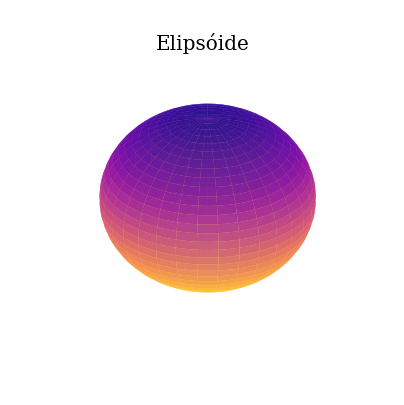

In [5]:
def elipsoide():
    a = 1
    b = 1
    c = 1
    u = np.linspace(0, pi, 100)
    v = np.linspace(0, 2 * pi, 100)
    u, v = np.meshgrid(u, v)
    x = a * sin(u) * cos(v)
    y = b * sin(u) * sin(v)
    z = c * cos(u)
    return eq_par(x, y, z)

grafico('Elipsóide', elipsoide())

Equação do elipsóide:  
$\Large \frac{x ^ 2}{a ^ 2} \normalsize + \Large \frac{y ^ 2}{b ^ 2} \normalsize + \Large \frac{z ^ 2}{c ^ 2} \normalsize = 1$  
  
  
Equações paramétricas do elipsóide:  
$\normalsize x = a \cdot \sin{u} \cdot \cos{v}$  
  
$\normalsize y = b \cdot \sin{u} \cdot \sin{v}$  
  
$\normalsize z = c \cdot \cos{u}$  
  
Com $0 < u < \pi$ e $0 < v < 2\pi$.

---


## HIPERBOLÓIDE DE UMA FOLHA

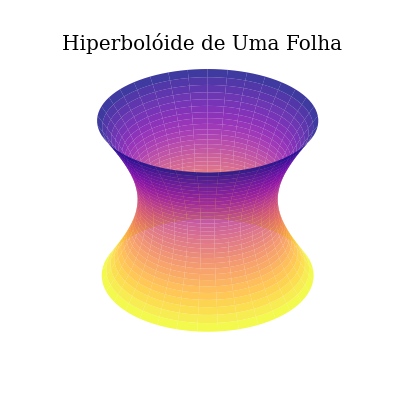

In [6]:
def hiper_1():
    a = 1
    b = 1
    c = 1
    u = np.linspace(-1, 1, 100)
    v = np.linspace(0, 2 * pi, 100)
    u, v = np.meshgrid(u, v)
    x = a*(np.cosh(u) * np.cos(v))
    y = b*(np.cosh(u) * np.sin(v))
    z = c*(np.sinh(u))
    return eq_par(x, y, z)

grafico('Hiperbolóide de Uma Folha', hiper_1())

Equação do hiperbolóide de uma folha:  
$\Large \frac{x ^ 2}{a ^ 2} \normalsize + \Large \frac{y ^ 2}{b ^ 2} \normalsize - \Large \frac{z ^ 2}{c ^ 2} \normalsize = 1$  
  
  
Equações paramétricas do hiperbolóide de uma folha:  
$\normalsize x = a \cdot \cosh{u} \cdot \cos{v}$  
  
$\normalsize y = b \cdot \cosh{u} \cdot \sin{v}$  
  
$\normalsize z = c \cdot \sinh{u}$  
  
Com $-1 < u < 1$ e $0 < v < 2\pi$.

---


## Cone

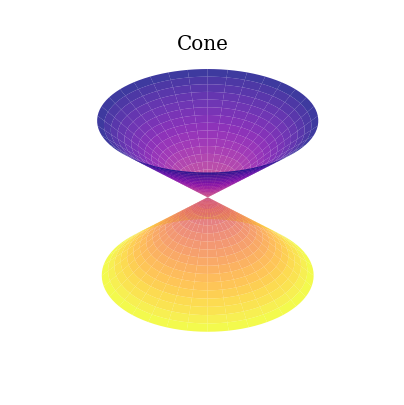

In [7]:
def cone():
    a = 1
    b = 1
    c = 1
    u = np.linspace(-1, 1, 100)
    v = np.linspace(0, 2 * pi, 100)
    u, v = np.meshgrid(u, v)
    x = a * u * np.cos(v)
    y = b * u * np.sin(v)
    z = c * u
    return eq_par(x, y, z)

grafico('Cone', cone())

Equação do cone:  
$\Large \frac{x ^ 2}{a ^ 2} \normalsize + \Large \frac{y ^ 2}{b ^ 2} \normalsize = \Large \frac{z ^ 2}{c ^ 2}$  
  
  
Equações paramétricas do cone:  
$\normalsize x = a \cdot u \cdot \cos{v}$  
  
$\normalsize y = b \cdot u \sin{v}$  
  
$\normalsize z = c \cdot u$  
  
Com $-1 < u < 1$ e $0 < v < 2\pi$.

---


## PARABOLÓIDE ELÍPTICO

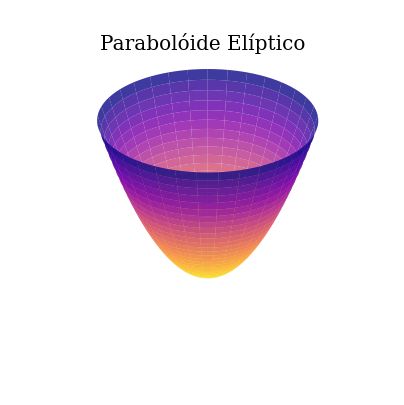

In [8]:
def parab_elip():
    a = 1
    b = 1
    c = 1
    u = np.linspace(0, 2, 100)
    v = np.linspace(0, 2 * pi, 100)
    u, v = np.meshgrid(u, v)
    x = a * u * np.cos(v)
    y = b * u * np.sin(v)
    z = c * u**2
    return eq_par(x, y, z)

grafico('Parabolóide Elíptico', parab_elip())

Equação do hiperbolóide:  
$\Large \frac{x ^ 2}{a ^ 2} \normalsize + \Large \frac{y ^ 2}{b ^ 2} \normalsize = \Large \frac{z}{c}$  
  
  
Equações paramétricas do elipsóide:  
$\normalsize x = a \cdot u \cdot \cos{v}$  
  
$\normalsize y = b \cdot u \cdot \sin{v}$  
  
$\normalsize z = c \cdot u^2$  
  
Com $0 < u < 2$ e $0 < v < 2\pi$.

---


## PARABOLÓIDE HIPERBÓLICO

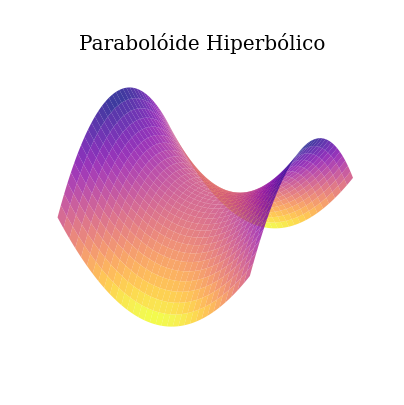

In [9]:
def parab_hiper():
    a = 1
    b = 1
    c = 1
    u = np.linspace(-1, 1, 100)
    v = np.linspace(-1, 1, 100)
    u, v = np.meshgrid(u, v)
    x = a * u 
    y = b * v 
    z = c * (u**2-v**2)
    return eq_par(x, y, z)

grafico('Parabolóide Hiperbólico', parab_hiper())

Equação do hiperbólico:  
$\Large \frac{x ^ 2}{a ^ 2} \normalsize - \Large \frac{y ^ 2}{b ^ 2} \normalsize = \Large \frac{z}{c}$  
  
  
Equações paramétricas do hiperbolóide de uma folha:  
$\normalsize x = a \cdot u$  
  
$\normalsize y = b \cdot v$  
  
$\normalsize z = c \cdot ({u^2} + {v^2})$  
  
Com $-1 < u < 1$ e $0 < v < 2\pi$.

---


In [10]:
rot = np.linspace(0,360,50) # Range da rotação
func = hiper_1() # Colocar a função da quadrica que deseja visualizar
caminho = '' # Caminho da pasta onde deseja salvar os frames

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(func.x,func.y,func.z,alpha=0.6,cmap='plasma')
ax.axis('square')
ax.axis('off')
for i in rot:
    ax.view_init(elev = i, azim = i)
    plt.savefig(caminho+str(i)+'.png',dpi=100)
plt.close()


# REFERÊNCIAS
- STEWART, James; ROMO, Jorge Humberto. cálculo. Cengage Learning, 2017.
- https://stackoverflow.com/questions/23378688/matplotlib-surface-plot-extends-past-axis-limits
- https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html
